# Predicting Loan Repayment Status

#### Data Import

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the Dataset

In [14]:
df = pd.read_csv('/Users/adam/Documents/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated and will be removed in a future version")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

#### Attempting to predict loan_status using Exploratory Data Analysis 

<Axes: xlabel='loan_status', ylabel='count'>

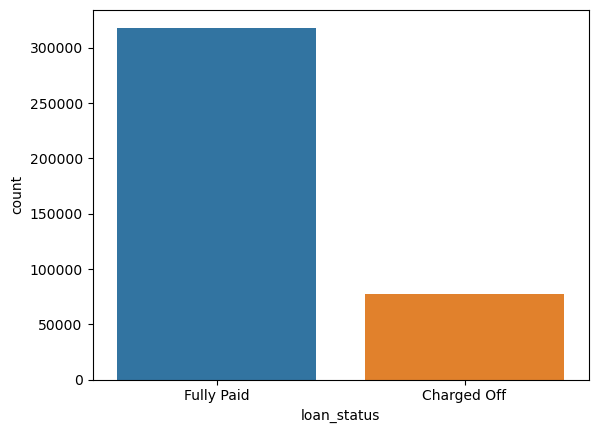

In [22]:
sns.countplot(x='loan_status', data=df)

<Figure size 1200x400 with 0 Axes>

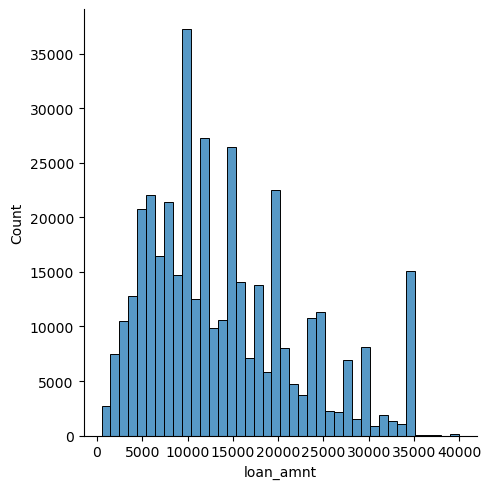

In [23]:
plt.figure(figsize=(12,4))
sns.displot(df['loan_amnt'], kde=False, bins=40)

In [434]:
#### Correlation between the continous feature variables

In [26]:
# Select only the columns with float data types
float_columns = df.select_dtypes(include=['float64'])
float_columns.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### Heatmap of Correlations

<Axes: >

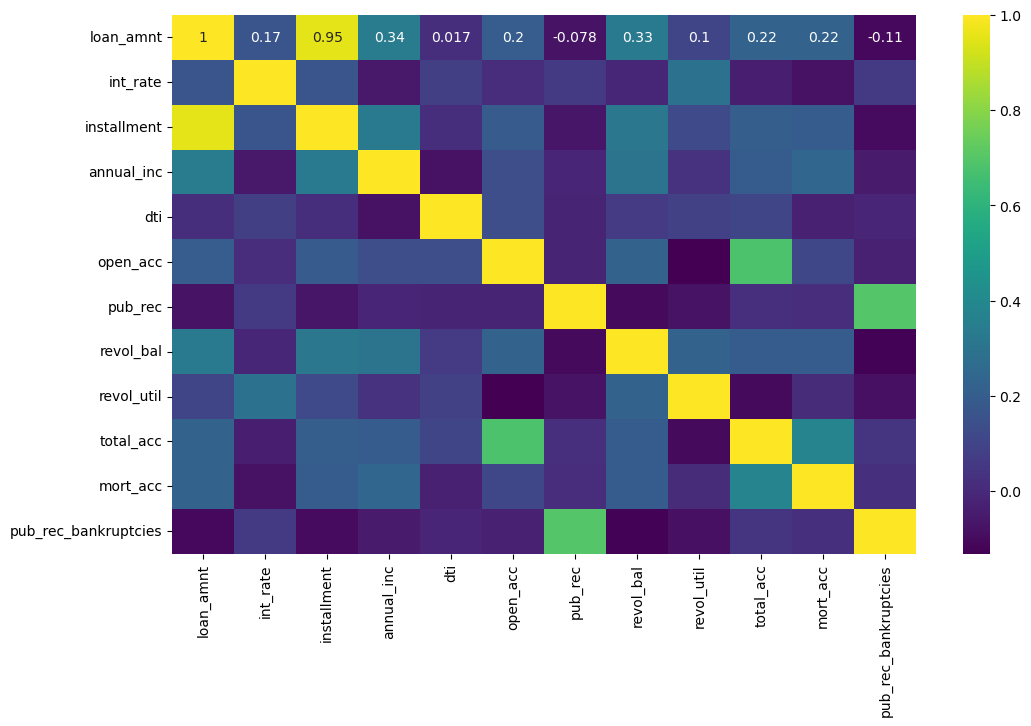

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(float_columns.corr(), annot=True, cmap='viridis')


#### Installment vs Loan Amount - ScatterPlot

<Axes: xlabel='installment', ylabel='loan_amnt'>

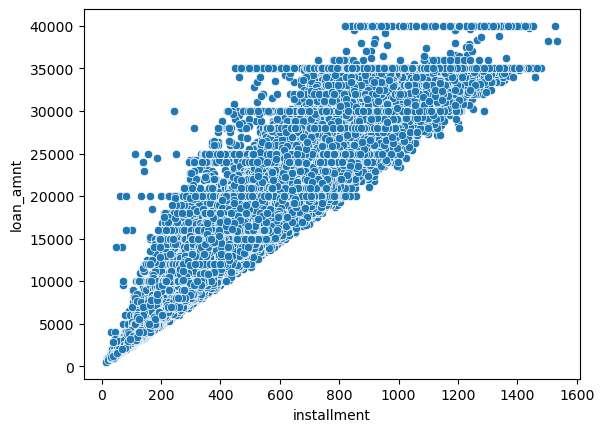

In [30]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

### Botplot between the loan_status and the loan_amnt

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

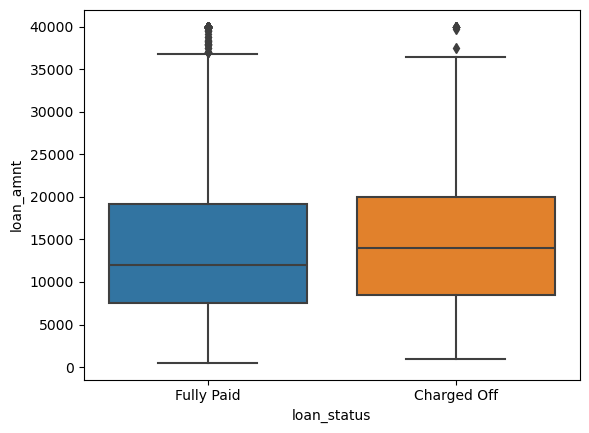

In [33]:
sns.boxplot(x='loan_status', y= 'loan_amnt', data=df)

In [35]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Grade and Subgrade Analysis

In [37]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [38]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

#### Counterplot per grade

<Axes: xlabel='grade', ylabel='count'>

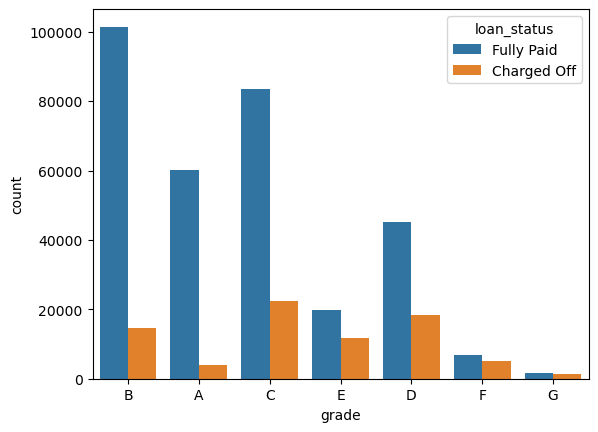

In [45]:
sns.countplot(x='grade', data=df, hue='loan_status')

#### Counterplot per sub_grade

<Axes: xlabel='sub_grade', ylabel='count'>

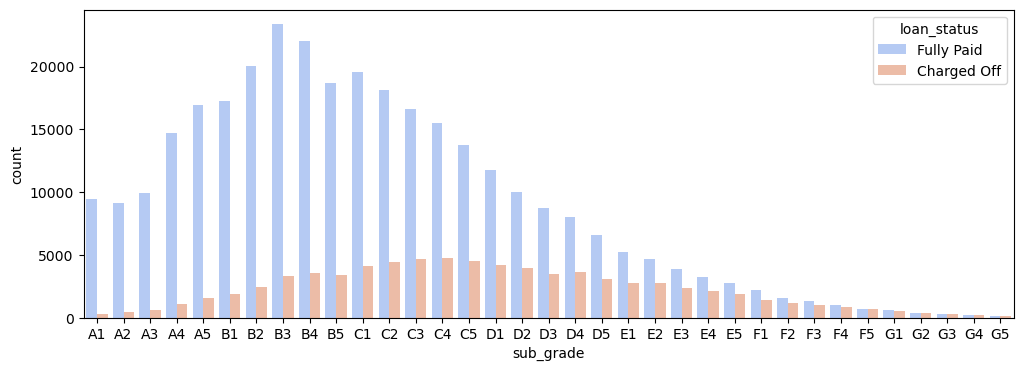

In [48]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order =subgrade_order, palette='coolwarm', hue='loan_status')

#### F and G Subgrades Analysis

<Axes: xlabel='sub_grade', ylabel='count'>

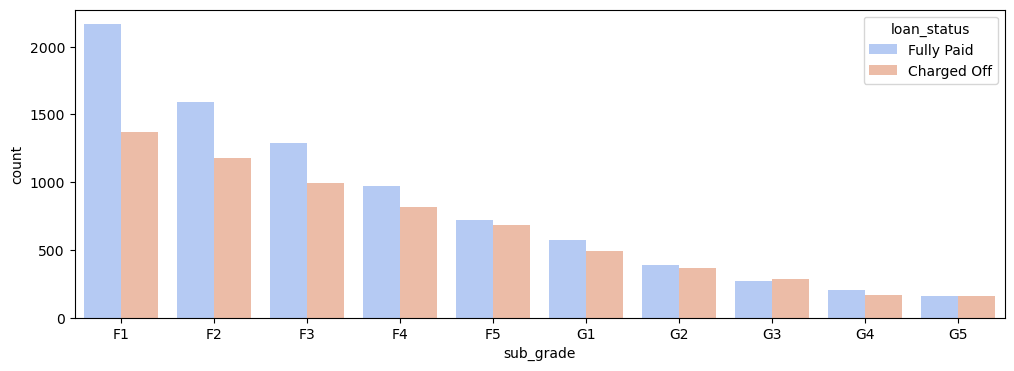

In [49]:
f_and_g = df[(df['grade']=='G')| (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order =subgrade_order, palette='coolwarm', hue='loan_status')

#### Feature Engineering

In [96]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid' :1, 'Charged Off':0})
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


#### Which numeric features have the highest correlation with the actual label

<Axes: >

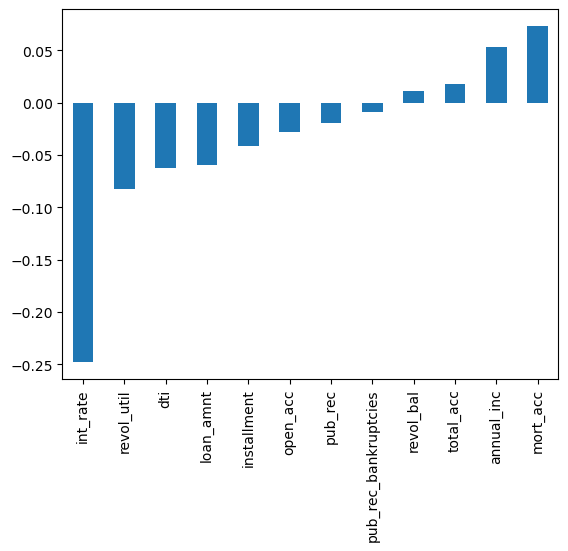

In [104]:
# Calculate the correlation matrix

if 'loan_repaid' in df.columns and df['loan_repaid'].dtype != 'float64':
    df['loan_repaid'] = df['loan_repaid'].astype('float64')

float_columns = df.select_dtypes(include=['float64'])
correlation_matrix = float_columns.corr()

correlation_matrix['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')



### Missing data

In [70]:
len(df)

396030

### Series that displays the total count of missing values per column

In [73]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Converting the series in terms of percentage of total dataframe

In [76]:
df.isnull().sum()/len(df) *100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### How many unique employment job titles are there?

In [80]:
df['emp_title'].nunique()

173105

In [106]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

#### To many unique job titles to try to convert this to a dummy variable feature. Removing....

In [113]:
df = df.drop('emp_title', axis=1)

In [117]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [131]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

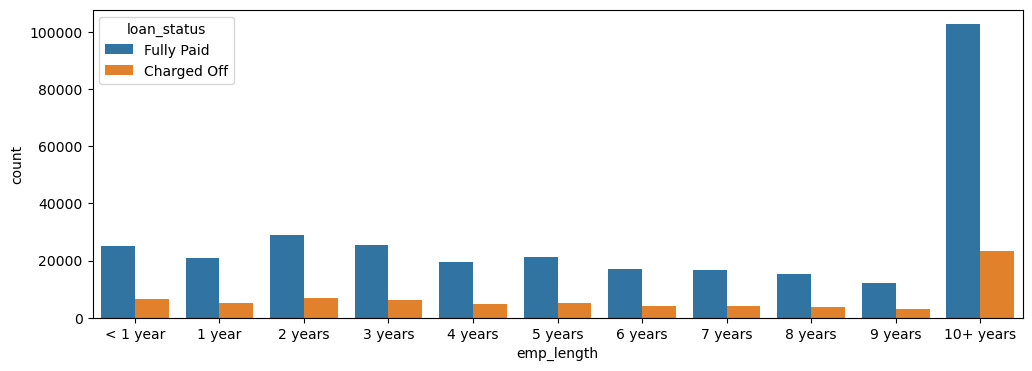

In [133]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')

#### Percentage of charge offs per category

In [144]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [142]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [154]:
emp_co/(emp_co+emp_fp)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [150]:
emp_len = emp_co/(emp_co+emp_fp)

<Axes: xlabel='emp_length'>

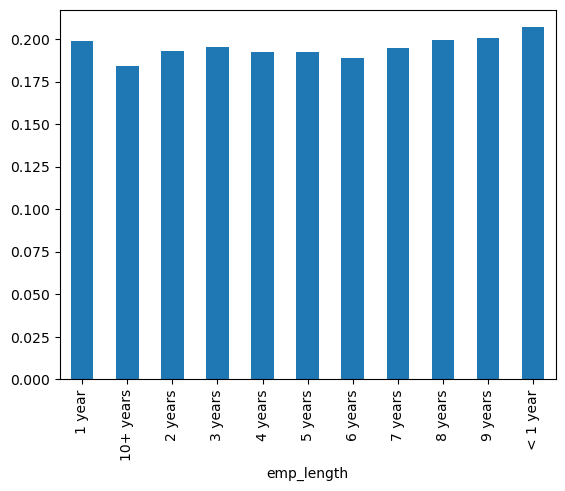

In [152]:
emp_len.plot(kind='bar')

#### Dropping emp_length due to being extremely similar

In [156]:
df = df.drop('emp_length', axis=1)

#### Looking what still have missing features

In [161]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Reviewing title column and purpose column

In [170]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [172]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [174]:
df=df.drop('title', axis=1)

In [176]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

#### Correlation with the mort_acc column

In [181]:
float_columns.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### Mean of mort_acc column per total_acc

In [193]:
float_columns.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [195]:
total_acc_avg = float_columns.groupby('total_acc').mean()['mort_acc']

In [221]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [223]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis =1)

In [224]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [227]:
df = df.dropna()

In [229]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [235]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [237]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [243]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

/var/folders/rs/jpq917xx0cn4ry46vj9_th4m0000gn/T/ipykernel_8547/2179920926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [245]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [249]:
df = df.drop('grade', axis=1)

In [255]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [257]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [262]:
dummies = pd.get_dummies(df[['verification_status','application_type', 'initial_list_status', 'purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

#### Reviewing the value

In [267]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [271]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [273]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [275]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

#### Feature engineer from the zip code

In [280]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [282]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [284]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

In [286]:
df = df.drop('address', axis=1)

In [291]:
df = df.drop('issue_d', axis=1)

#### Extracting the year from earliest_cr_line

In [299]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [303]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

#### Train test splits

In [307]:
from sklearn.model_selection import train_test_split

In [309]:
df = df.drop('loan_status', axis=1)

In [325]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [327]:
df = df.sample(frac=0.1, random_state=101)

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=101)

#### Normalizing Data

In [336]:
from sklearn.preprocessing import MinMaxScaler

In [342]:
scaler = MinMaxScaler()

In [344]:
X_train = scaler.fit_transform(X_train)

In [346]:
X_test = scaler.transform(X_test)

#### Creating model

In [356]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#### Defining the Model

In [364]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [366]:
X_train.shape

(3161, 78)

In [372]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.7049 - val_loss: 0.6189
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5973 - val_loss: 0.5255
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5189 - val_loss: 0.4894
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4843 - val_loss: 0.4744
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4556 - val_loss: 0.4549
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4618 - val_loss: 0.4325
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4403 - val_loss: 0.4076
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4089 - val_loss: 0.3843
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4019 - val_loss: 0.3668
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3981 - val_loss: 0.3501
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3657 - val_loss: 0.3388
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3537 - v

In [374]:
from tensorflow.keras.models import load_model

In [378]:
model.save('myfirstmodel.keras')

In [380]:
losses = pd.DataFrame(model.history.history)

<Axes: >

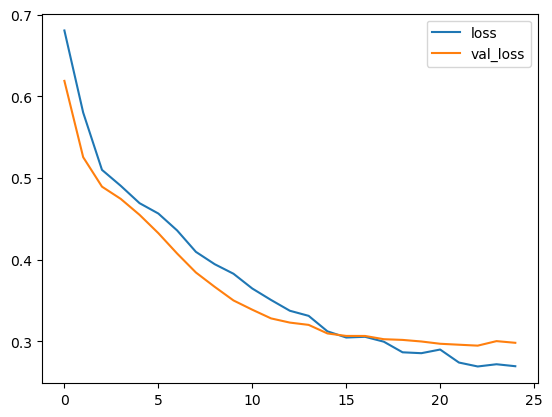

In [382]:
losses.plot()

In [384]:
### Predictions

In [386]:
from sklearn.metrics import classification_report, confusion_matrix

In [400]:
predictions = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [408]:
predictions_probabilities = model.predict(X_test)

predictions = (predictions_probabilities > 0.5).astype(int)

# Ensure y_test is composed of integer labels
y_test = np.array(y_test).astype(int)

# Generate the classification report
print(classification_report(y_test, predictions))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.42      0.56       161
           1       0.87      0.98      0.92       630

    accuracy                           0.87       791
   macro avg       0.86      0.70      0.74       791
weighted avg       0.87      0.87      0.85       791



In [410]:
df['loan_repaid'].value_counts()

loan_repaid
1.0    314
0.0     81
Name: count, dtype: int64

In [412]:
confusion_matrix(y_test, predictions)

array([[ 67,  94],
       [ 11, 619]])

In [415]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt      28000.0
term                36
int_rate         16.49
installment     991.19
annual_inc     92000.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 332439, Length: 78, dtype: object

In [421]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [425]:
model.predict(new_customer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


array([[0.886912]], dtype=float32)

In [428]:
df.iloc[random_ind]['loan_repaid']

1.0